# **1. Mengimpor library yang diperlukan**

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import get_close_matches
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate

# **2. Data Understanding**

Memuat dataset dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Load dataset
anime_df = pd.read_csv("/content/sample_data/top_anime_dataset.csv")

In [ ]:
# Tampilkan sampel data
print("Sampel Data Anime:")
print(anime_df.head())

Sampel Data Anime:
                                 Name  Rating  Ranked           Popularity  \
0                   Sousou no Frieren    9.32       1  Sep 2023 - Mar 2024   
1    Fullmetal Alchemist: Brotherhood    9.10       2  Apr 2009 - Jul 2010   
2                One Piece Fan Letter    9.09       3  Oct 2024 - Oct 2024   
3                         Steins;Gate    9.07       4  Apr 2011 - Sep 2011   
4  Shingeki no Kyojin Season 3 Part 2    9.05       5  Apr 2019 - Jul 2019   

             Members Type  
0    974,075 members   TV  
1  3,452,671 members   TV  
2     73,667 members   TV  
3  2,645,303 members   TV  
4  2,379,562 members   TV  


Memuat dataset dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Informasi dataset
print("Info Dataset:")
print(anime_df.info())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10000 non-null  object 
 1   Rating      10000 non-null  float64
 2   Ranked      10000 non-null  int64  
 3   Popularity  10000 non-null  object 
 4   Members     10000 non-null  object 
 5   Type        10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB
None


Ringkasan dataset :


1.   Jumlah Total Baris (Data/Entitas): 10.000
2.   Jumlah Total Kolom (Fitur/Variabel): 6

In [ ]:
# Cek nilai null
print("Missing Values:")
print(anime_df.isnull().sum())

Missing Values:
Name          0
Rating        0
Ranked        0
Popularity    0
Members       0
Type          0
dtype: int64


Tidak terdapat nilai null (missing value) dari struktur dataset tersebut.

In [ ]:
# Statistik deskriptif
print("Statistik Deskriptif Dataset:")
print(anime_df.describe())

Statistik Deskriptif Dataset:
             Rating       Ranked
count  10000.000000  10000.00000
mean       6.938317   5000.50000
std        0.632787   2886.89568
min        5.970000      1.00000
25%        6.420000   2500.75000
50%        6.860000   5000.50000
75%        7.360000   7500.25000
max        9.320000  10000.00000


**Ringkasan Analisis Statistik Deskriptif:**

- Rating Anime :
1. Rata-rata: 6.94 (standar deviasi rendah = 0.63), menunjukkan konsistensi.
2. 75% anime memiliki rating ≥6.42, dengan nilai tertinggi 9.32.

- Peringkat (Ranked)
1. Distribusi merata dari peringkat 1–10.000 (mean = 5000.5).
2. Tidak ada korelasi langsung dengan rating.

- Insight
1. Mayoritas anime berkualitas baik (rating >6.4).
2. Peringkat tidak dipengaruhi oleh rating, mungkin tergantung popularitas.

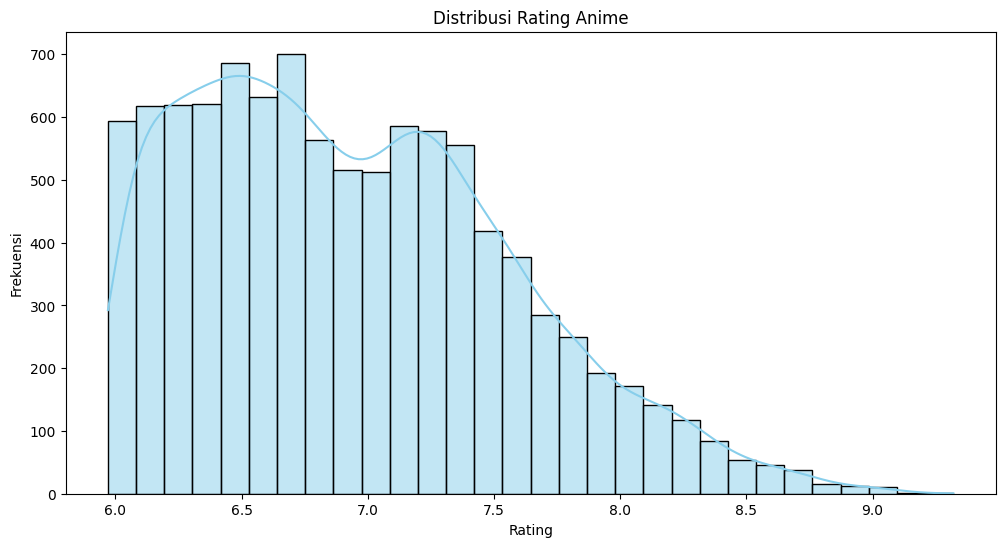

In [ ]:
# Distribusi Rating Anime
plt.figure(figsize=(12, 6))
sns.histplot(anime_df['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

**Kesimpulan Distribusi Rating Anime**
1. Dominasi Rating Menengah
- Sebagian besar anime terkonsentrasi pada rentang 6.5–7.5, menunjukkan kualitas rata-rata yang stabil.
2. Sedikit Anime dengan Rating Ekstrem
- Rating di atas 8.0 sangat jarang (jumlah anime turun drastis).
- Hanya segelintir anime yang mencapai rating 9.0 (kualitas exceptional).
3. Distribusi Miring ke Kanan
- Ekor panjang di sisi kanan (rating tinggi) mengindikasikan adanya beberapa anime dengan performa luar biasa.
4. Implikasi
- Sistem rekomendasi yang dibangun ini perlu mempertimbangkan rating tinggi sebagai outlier (langka tetapi bernilai).
- Fokus pada anime dengan rating 6.5–7.5 akan mencakup mayoritas konten.

In [ ]:
# Top Anime Berdasarkan Rating
top_rated = anime_df.nlargest(10, 'Rating')[['Name', 'Rating', 'Type']]
print("Top 10 Anime Berdasarkan Rating:")
print(top_rated)

Top 10 Anime Berdasarkan Rating:
                                 Name  Rating   Type
0                   Sousou no Frieren    9.32     TV
1    Fullmetal Alchemist: Brotherhood    9.10     TV
2                One Piece Fan Letter    9.09     TV
3                         Steins;Gate    9.07     TV
4  Shingeki no Kyojin Season 3 Part 2    9.05     TV
5                            Gintama°    9.05     TV
6                  Gintama: The Final    9.04  Movie
7                            Gintama'    9.03     TV
8              Hunter x Hunter (2011)    9.03     TV
9                 Gintama': Enchousen    9.02     TV


**Kesimpulan Top 10 Anime Berdasarkan Rating**
1. Dominasi Genre Shounen/Seinen
- 9 dari 10 anime teratas merupakan serial TV (bertipe "TV"), dengan dominasi genre action/adventure seperti Fullmetal Alchemist dan Hunter x Hunter.
2. Eksklusivitas Rating Tinggi
- Semua anime memiliki rating di atas 9.0, menunjukkan kualitas yang sangat istimewa dan konsisten.
- Sousou no Frieren memuncaki daftar dengan rating 9.32.

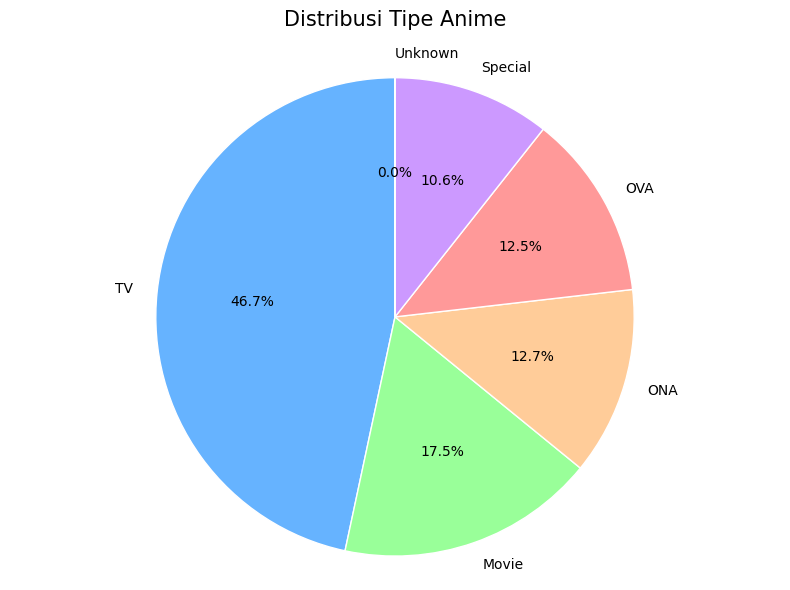

In [ ]:
# 2.3. Distribusi Tipe Anime (Pie Chart)
plt.figure(figsize=(8, 6))
type_counts = anime_df['Type'].value_counts()

# Create pie chart
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#99ff99','#ffcc99','#ff9999','#cc99ff'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add title and make it look nice
plt.title('Distribusi Tipe Anime', pad=20, fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as circle

plt.tight_layout()
plt.show()

**Kesimpulan Distribusi Tipe Anime**
1. Dominasi Anime TV
- 46.7% dari total anime merupakan tipe TV (serial televisi), menunjukkan format ini paling populer dalam industri.
2. Konten Alternatif Signifikan
- OVA (12.5%) dan ONA (12.7%) bersama-sama menyumbang 25.2%, mencerminkan tren konten digital/eksklusif yang berkembang.
3. Film Anime (Movie)
- 17.5% berbentuk film, presentase yang cukup tinggi.
4. Konten Spesial & Unknown
- Special (10.6%): Biasanya berupa episode bonus atau OVA pendek.
- Unknown (0.0%): Tidak ada data yang tidak teridentifikasi.

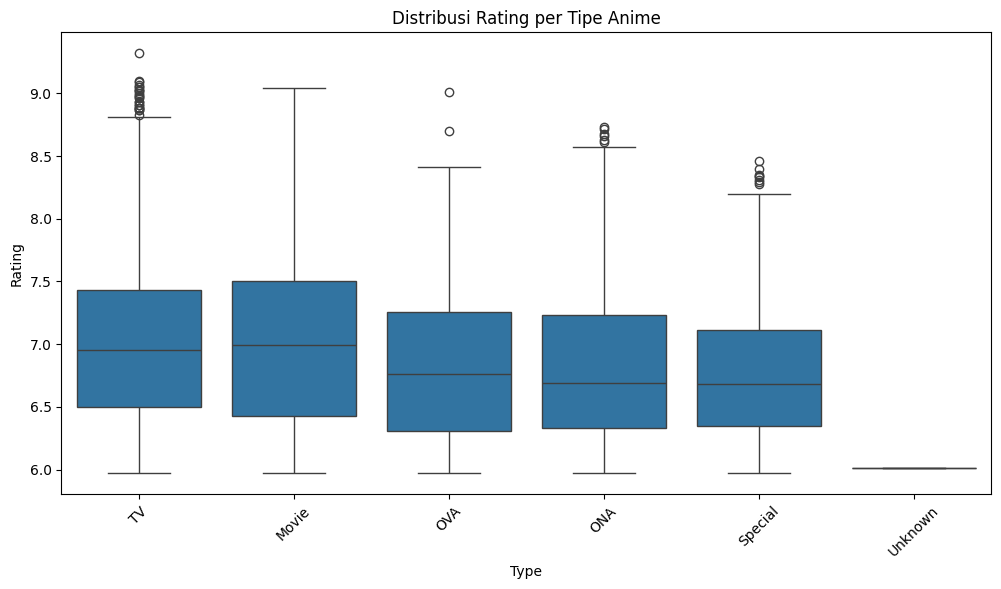

In [ ]:
# Analisis Boxplot Rating per Tipe Anime
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rating', data=anime_df)
plt.title('Distribusi Rating per Tipe Anime')
plt.xticks(rotation=45)
plt.show()

**Berdasarkan boxplot "Distribusi Rating per Tipe Anime", berikut beberapa kesimpulan yang dapat diambil:**

1. Peringkat Tertinggi secara Median
- Movie memiliki median rating tertinggi dibandingkan tipe anime lainnya.
- Diikuti oleh TV, sementara Special, ONA, dan OVA memiliki median yang lebih rendah.
2. Variasi Rating
- Semua tipe anime kecuali Unknown menunjukkan variasi (interquartile range/IQR) yang cukup besar, yang berarti persebaran nilai rating cukup lebar.
3. Outlier
- Hampir semua kategori (TV, OVA, ONA, Special) menunjukkan adanya outlier pada sisi atas, menunjukkan beberapa anime dengan rating sangat tinggi.
- TV memiliki lebih banyak outlier dibandingkan yang lain, mengindikasikan adanya beberapa anime yang sangat populer.
4. Rentang Rating
Semua tipe (kecuali Unknown) memiliki rentang rating yang mirip, umumnya antara sekitar 6.0 hingga 9.0+.

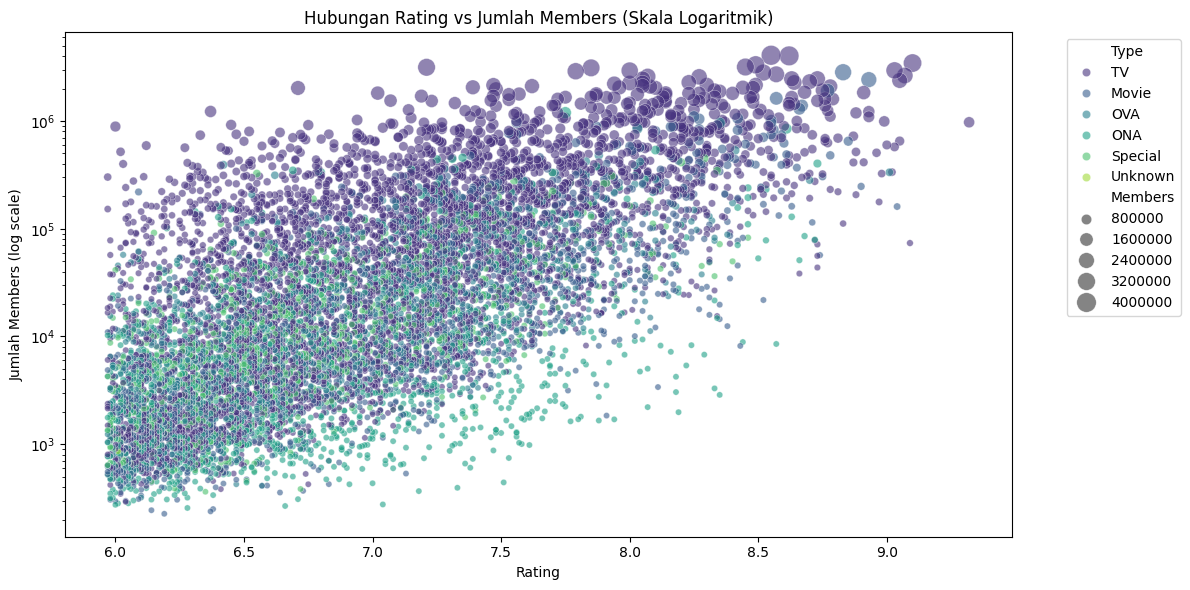

In [ ]:
# Tren Rating Anime
# Konversi Members ke numeric dengan menghilangkan 'members' dan koma
anime_df['Members'] = anime_df['Members'].str.replace(' members', '')  # Hapus teks 'members'
anime_df['Members'] = anime_df['Members'].str.replace(',', '')  # Hapus koma sebagai thousand separator
anime_df['Members'] = anime_df['Members'].astype(int)  # Konversi ke integer

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Members', data=anime_df,
                hue='Type', alpha=0.6, palette='viridis', size='Members', sizes=(20, 200))
plt.title('Hubungan Rating vs Jumlah Members (Skala Logaritmik)')
plt.xlabel('Rating')
plt.ylabel('Jumlah Members (log scale)')
plt.yscale('log')  # Gunakan skala logaritmik karena range members sangat besar
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Kesimpulan yang dapat diambil dari visualisasi "Hubungan Rating vs Jumlah Members (Skala Logaritmik)":**

1. Korelasi Positif antara Rating dan Jumlah Members
- Secara umum, terdapat hubungan positif antara rating dan jumlah members. Artinya, anime dengan rating yang lebih tinggi cenderung memiliki lebih banyak members (penggemar/penonton).
2. Distribusi Logaritmik yang Luas
- Dengan menggunakan skala logaritmik pada sumbu jumlah members, terlihat bahwa jumlah anggota sangat bervariasi — mulai dari ribuan hingga jutaan — yang tidak terlihat jelas dalam skala linear.
3. Dominasi Anime Tipe TV
- Tipe anime TV mendominasi pada semua tingkat rating dan jumlah members. Banyak anime TV memiliki jutaan members dan rating tinggi, ditunjukkan oleh ukuran lingkaran besar dan warna ungu dominan di bagian kanan atas grafik.
4. Kepadatan Data pada Rating 6.5 - 8.5
- Sebagian besar anime terkonsentrasi pada rentang rating 6.5 hingga 8.5, dengan jumlah members mulai dari puluhan ribu hingga jutaan.

# **3. Data Preparation**

In [ ]:
# Mengecek data duplikat
anime_df.duplicated().sum()

np.int64(0)

In [ ]:
# Konversi kolom 'Popularity' dan 'Members' menjadi numerik
anime_df['Popularity'] = pd.to_numeric(anime_df['Popularity'], errors='coerce')
anime_df['Members'] = pd.to_numeric(anime_df['Members'], errors='coerce')

In [ ]:
# Bersihkan dan tambahkan fitur gabungan
anime_df['combined_features'] = anime_df['Name'] + ' ' + anime_df['Type']

In [ ]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime_df['combined_features'])

# **4. Data Modelling & Result**

In [ ]:
# Hitung cosine similarity antar anime
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Mapping dari nama anime ke indeks
indices = pd.Series(anime_df.index, index=anime_df['Name']).drop_duplicates()

In [ ]:
# Fungsi untuk menemukan judul terdekat
def find_closest_title(title):
    matches = get_close_matches(title, anime_df['Name'], n=1, cutoff=0.6)
    return matches[0] if matches else None

In [ ]:
# Fungsi rekomendasi berbasis Content Based Learning
def content_based_recommendation(title):
    closest_title = find_closest_title(title)
    if not closest_title:
        print(f"❌ '{title}' tidak ditemukan.")
        return pd.DataFrame()

    idx = indices[closest_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:31]  # Ambil 30 teratas

    anime_indices = [i[0] for i in sim_scores]
    similar_animes = anime_df.iloc[anime_indices].copy()

    # Tampilkan langsung berdasarkan skor kemiripan
    similar_animes['similarity_score'] = [score[1] for score in sim_scores]

    # Urutkan berdasarkan similarity score
    top_recommended = similar_animes.sort_values(by='similarity_score', ascending=False).head(10)

    return top_recommended[['Name', 'Type', 'similarity_score']]

In [ ]:
# Contoh penggunaan
input_title = "Dragon Ball"
recommendations = content_based_recommendation(input_title)

print(f"\n🎬 Rekomendasi Anime Mirip '{input_title}':")
if not recommendations.empty:
    table = recommendations[['Name', 'Type']].reset_index(drop=True)
    table.index += 1  # Tambah penomoran mulai dari 1
    print(tabulate(table, headers=["No", "Name", "Type"], tablefmt="fancy_grid", showindex=True))
else:
    print("Tidak ada rekomendasi yang dapat diberikan.")


🎬 Rekomendasi Anime Mirip 'Dragon Ball':
╒══════╤═══════════════════════════════════════════════════════════╤═════════╕
│   No │ Name                                                      │ Type    │
╞══════╪═══════════════════════════════════════════════════════════╪═════════╡
│    1 │ Dragon Ball                                               │ TV      │
├──────┼───────────────────────────────────────────────────────────┼─────────┤
│    2 │ Dragon Ball Specials                                      │ Special │
├──────┼───────────────────────────────────────────────────────────┼─────────┤
│    3 │ Dragon Ball Super                                         │ TV      │
├──────┼───────────────────────────────────────────────────────────┼─────────┤
│    4 │ Dragon Ball Kai                                           │ TV      │
├──────┼───────────────────────────────────────────────────────────┼─────────┤
│    5 │ Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dragon Ball Z! │ TV      │
├──────┼──

# **5. Evaluation**

In [ ]:
# Evaluasi Precision berdasarkan relevansi (Type + Rating threshold)
if not recommendations.empty:
    # Dapatkan info anime input
    input_anime = anime_df[anime_df['Name'] == input_title]
    if input_anime.empty:
        closest_title = find_closest_title(input_title)
        input_anime = anime_df[anime_df['Name'] == closest_title]

    input_type = input_anime.iloc[0]['Type'].lower()
    input_rating = float(input_anime.iloc[0]['Rating'])

    # Hitung rekomendasi yang relevant (tipe sama DAN rating >= 5)
    relevant_recommendations = recommendations[
        (recommendations['Type'].str.lower() == input_type) &
        (recommendations['Rating'] >= 5)
    ]

    # Hitung Precision
    precision = (len(relevant_recommendations) / len(recommendations)) * 100

    # Tampilkan hasil
    print(f"\n🎯 Precision: {precision:.2f}%")
    print(f"• Relevansi dihitung berdasarkan:")
    print(f"  1. Type sama dengan '{input_title}' ({input_type})")
    print(f"  2. Rating ≥ 5 (threshold)")


🎯 Precision: 70.00%
• Relevansi dihitung berdasarkan:
  1. Type sama dengan 'Dragon Ball' (tv)
  2. Rating ≥ 5 (threshold)
